In [6]:
# import libraries
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tomotopy as tp

In [18]:
# import data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [21]:
train.head()

,helpfulness_cat,imdb_user_review
0,1.0,It is hard to find such delightful and adorabl...
1,1.0,"They don't make films like this faded, hauntin..."
2,1.0,I first viewed this movie in 1924 at age 6 yrs...
3,1.0,I doubt that I'd ever seen anything resembling...
4,1.0,I was shocked to find myself riveted to this m...


In [9]:
print(sum(train['helpfulness_cat'])/len(train))


0.7637377963737796


In [10]:
document_lengths = np.array(list(map(len, train['imdb_user_review'].str.split(' '))))

print("The average number of words in a document is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a document is: {}.".format(min(document_lengths)))
print("The maximum number of words in a document is: {}.".format(max(document_lengths)))

The average number of words in a document is: 175.48888888888888.
The minimum number of words in a document is: 6.
The maximum number of words in a document is: 3954.


/opt/anaconda3/envs/smm694/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of number of words'}, xlabel='Number of words', ylabel='Density'>

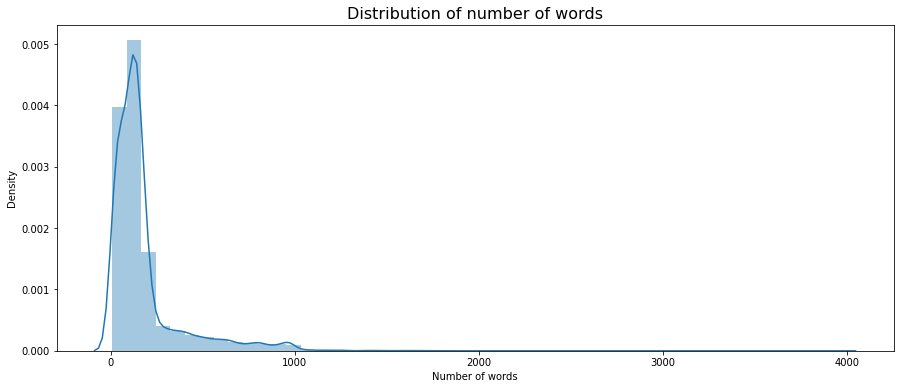

In [11]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(document_lengths, bins=50, ax=ax)

In [12]:
print("There are {} documents with over 1500 words.".format(sum(document_lengths > 1500)))
print("There are {} documents with max 6 words.".format(sum(document_lengths <= 6)))

There are 9 documents with over 1500 words.
There are 2 documents with max 6 words.


Word2Vec

In [16]:
# load spacy
nlp = spacy.load('en_core_web_sm')

,helpfulness_cat,imdb_user_review
0,1.0,It is hard to find such delightful and adorabl...
1,1.0,"They don't make films like this faded, hauntin..."
2,1.0,I first viewed this movie in 1924 at age 6 yrs...
3,1.0,I doubt that I'd ever seen anything resembling...
4,1.0,I was shocked to find myself riveted to this m...
...,...,...
95,1.0,I don't know why this movie always hooks me th...
96,1.0,What a genius Joseph L Manckiewicz was. A lite...
97,1.0,When I first saw this movie I didn't think I w...
98,1.0,Bogart stretches his acting muscles and allows...


In [22]:
train

,helpfulness_cat,imdb_user_review
0,1.0,It is hard to find such delightful and adorabl...
1,1.0,"They don't make films like this faded, hauntin..."
2,1.0,I first viewed this movie in 1924 at age 6 yrs...
3,1.0,I doubt that I'd ever seen anything resembling...
4,1.0,I was shocked to find myself riveted to this m...
...,...,...
10750,0.0,The makers of this movie really touched a sore...
10751,0.0,I Care A Lot is an exhilarating black comedy w...
10752,0.0,Really loved this. This film is masterful in t...
10753,0.0,"The story, direction and acting across the boa..."


In [ ]:
## NER
comments = [i for i in train['imbd_user_review']]


LDA

In [13]:
# create a small sample of the training data
train = train[:100]
train

,helpfulness_cat,imdb_user_review
0,1.0,It is hard to find such delightful and adorabl...
1,1.0,"They don't make films like this faded, hauntin..."
2,1.0,I first viewed this movie in 1924 at age 6 yrs...
3,1.0,I doubt that I'd ever seen anything resembling...
4,1.0,I was shocked to find myself riveted to this m...
...,...,...
95,1.0,I don't know why this movie always hooks me th...
96,1.0,What a genius Joseph L Manckiewicz was. A lite...
97,1.0,When I first saw this movie I didn't think I w...
98,1.0,Bogart stretches his acting muscles and allows...


In [14]:
# LDA
nlp = spacy.load("en_core_web_sm")
docs_tokens, tmp_tokens = [], []
for item in train.loc[:, "imdb_user_review"].to_list():
    tmp_tokens = [
        token.lemma_
        for token in nlp(item)
        if not token.is_stop and not token.is_punct and not token.like_num
    ]
    docs_tokens.append(tmp_tokens)
    tmp_tokens = []

In [15]:
docs_tokens

[['hard',
  'find',
  'delightful',
  'adorable',
  'movie',
  'day',
  '\\"The',
  'Kid\\',
  'silent',
  'movie',
  'rich',
  'win',
  'beautiful',
  'don\\u00b4',
  't',
  'nead',
  'word',
  'Chaplin',
  'year',
  'old',
  'Coogan',
  'possibly',
  'charming',
  'pair',
  'see',
  'life',
  'film',
  'succee',
  'nicely',
  'light',
  'joy',
  'overwhelmingly',
  'sad',
  'sentimental',
  'eye',
  'tear',
  'saddness',
  'happiness',
  'cry',
  'movie',
  'music',
  'simply',
  'oscar',
  'level',
  'movie',
  'sympathetic',
  'feeling',
  'touchingly',
  'funny',
  'moment',
  'truly',
  'masterpiece',
  'show',
  'extraordinary',
  'talented',
  'person',
  'Charlie',
  'Chaplin',
  'consider',
  'film',
  'respectively',
  'year',
  'old',
  'don\\u00b4',
  't',
  'miss',
  'it\\u00b4',
  'age',
  'don\\u00b4',
  't',
  'miss'],
 ['film',
  'like',
  'fade',
  'haunt',
  'masterpiece',
  'silent',
  'cinema',
  'anymore',
  'Dracula',
  'sale',
  'movie',
  'right',
  'man',
  '